# Tarea 1
## Francisco Javier Peralta Ramírez

In [256]:
import matplotlib.pyplot as plt
import numpy as np

In [84]:
A = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]

def matrix_transpose(mtx):
    tr = [] # lista donde guararemos la transpuesta
    for j in range(len(mtx[0])):
        t_v = [] #lista temporal para almacenar cada renglon
        for i in range(len(mtx)):
            t_v.append(mtx[i][j]) #cambiamos los indices (i,j) a (j,i)
        tr.append(t_v) #agregamos la lista intercalada a nuestra transpuesta
    return tr

matrix_transpose(A)

[[1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15], [4, 8, 12, 16]]

In [85]:
def matrix_transpose2(mtx):
    return [
             [   #internamente iteremos sobre i
                 mtx[i][j] for i in range(len(mtx))
             ]
             for j in range(len(mtx[0])) #iteramos sobre j externamente
           ]
matrix_transpose2(A)

[[1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15], [4, 8, 12, 16]]

In [344]:
def gen_random_sample_dist(interval, seed=56125798, c=12345, m=32768, a=1103515245):
    x,y = interval # pasa intervalo a dos variables (mas facil de manejar)
    seed = [seed] #copiar a arreglo, evitando errores de scope
    def aleatorio():
        seed[0] = (a * seed[0] + c) % m
        return seed[0] % (y - x) + x
    return aleatorio #regresa funcion que regresa valores aleatorios en el rango

def gen_N_rand_samples(n, N, interval):
    al = gen_random_sample_dist(interval)
    def gen_multi_random(N, interval):
        return [al() for j in range(N)]
    samples = [gen_multi_random(N, interval) for j in range(n)]
    return samples
    
interval = (0,10)
samples = gen_N_rand_samples(1, 1000, interval)

(array([  87.,   95.,   90.,  112.,  107.,  110.,  119.,   99.,   97.,   84.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

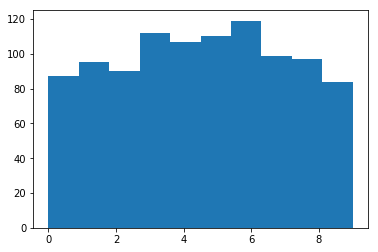

In [351]:
samplesT = matrix_transpose(samples)
sm = [sum(samplesT[i]) for i in range(len(samplesT))]
plt.hist(sm, bins=10)

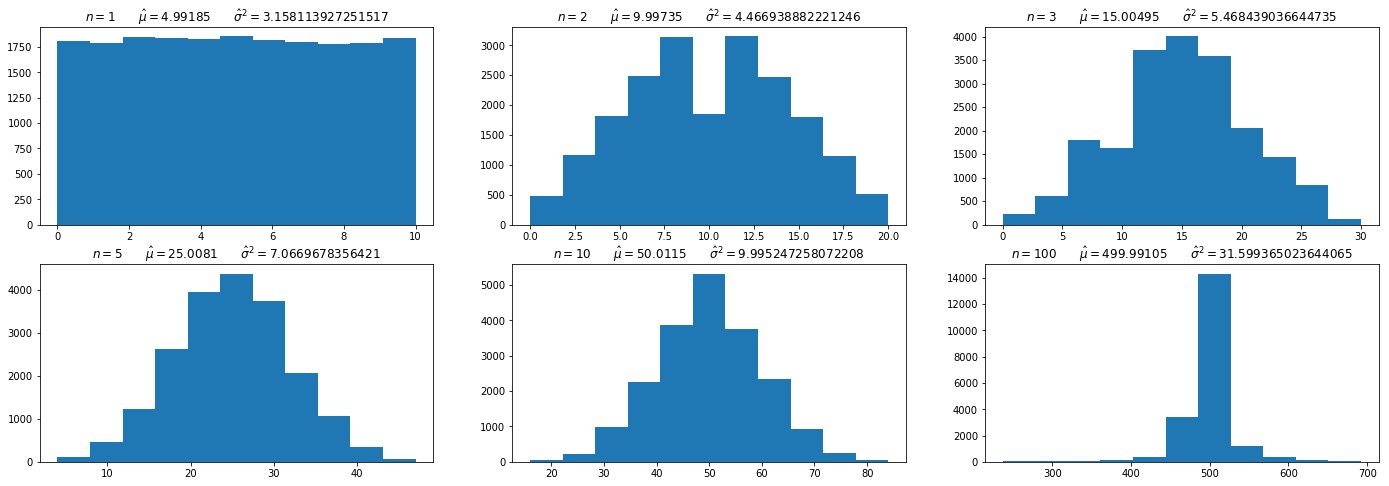

In [358]:
f, ax = plt.subplots(2, 3, figsize=(24, 8))
ns = [1, 2, 3, 5, 10, 100]
for i in range(2):
    for j in range(3):
        n = ns[i * 3 + j]
        interval = (0,11)
        samples = gen_N_rand_samples(n, 20000, interval)
        samplesT = matrix_transpose(samples)
        sm = [sum(samplesT[j]) for j in range(len(samplesT))]
        ax[i][j].hist(sm, bins = 11)
        ax[i][j].set_title(r'$n = {0} \qquad \hat\mu = {1} \qquad \hat\sigma^2 = {2}$'.format(n, np.mean(sm), np.std(sm)))
plt.show()

Sabemos que la media y la varianza de las distribuciones es



$\mu = \frac{n(b-a)}{2} \qquad \sigma^2 = \frac{n (b-a)}{12}$

usando esta información podemos generar los datos de una normal ${N}(\mu, \sigma)$. Consideramos $Z \sim N(0,1)$ por lo que $X = \sigma_x Z + \mu_x \quad Z = (X - \mu_x)/\sigma_x$. Si ahora podemos generar X, para generar $Y \sim N(\mu_y,\sigma_y)$ basta con escribir Y en terminos de X.
$$
Y = \sigma_y Z + \mu_y \\
Y = \sigma_y \frac{X - \mu_x}{\sigma_x} + \mu_y \\
$$

In [ ]:
def gen_normal(mu, sigma, n_dists):
    